In [1]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Preprocessing

In [2]:
data = pd.read_csv('BA_reviews.csv')

In [3]:
#add common words for british airways
stop=stopwords.words('english')
stop.extend(["british","ba", "airways", "fly", "flight", "airline", "aircraft","flights"])

In [4]:
#initialize wordcloud
wc = WordCloud(background_color='white', stopwords=stop, max_words=50, random_state=42)

In [5]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score=analyzer.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >=0.5:
        return 'Positive'
    elif compound_score <=-0.05:
        return 'Negative' 
    elif (compound_score <0.5) & (compound_score >-0.05):
        return 'Neutral'

# Reviews

In [24]:
reviews = data[['reviews', 'verified']].copy()

In [25]:
reviews['sentiment'] = reviews['sentiment'].apply(get_sentiment)

In [26]:
reviews['sentiment'].value_counts()

sentiment
Positive    456
Negative    426
Neutral     118
Name: count, dtype: int64

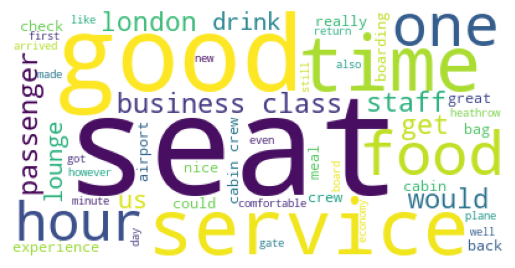

In [27]:
text= ' '.join(reviews['reviews'].loc[reviews['sentiment']=='Positive'])
cloud = wc.generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

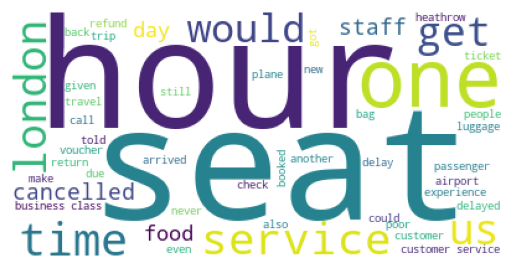

In [28]:
text= ' '.join(reviews['reviews'].loc[reviews['sentiment']=='Negative'])
cloud = wc.generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [29]:
verified_reviews = reviews[['reviews', 'sentiment']].loc[reviews['verified']==True]
unverified_reviews = reviews[[ 'reviews', 'sentiment']].loc[reviews['verified']==False]

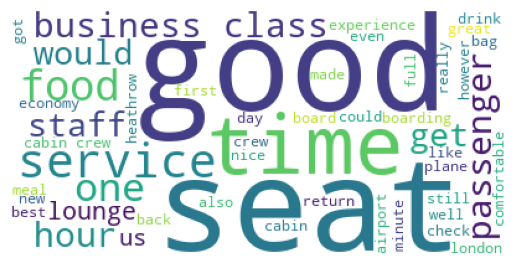

In [30]:
text_positive = ' '.join(verified_reviews['reviews'].loc[verified_reviews['sentiment']=='Positive'].str.lower())
pos_cloud = wc.generate(text_positive)
plt.imshow(pos_cloud)
plt.axis("off")
plt.show()

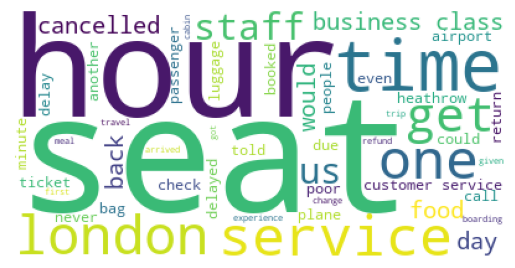

In [31]:
text_positive = ' '.join(verified_reviews['reviews'].loc[verified_reviews['sentiment']=='Negative'].str.lower())
pos_cloud = wc.generate(text_positive)
plt.imshow(pos_cloud)
plt.axis("off")
plt.show()

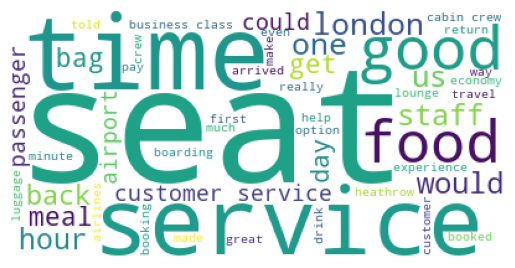

In [32]:
text_positive = ' '.join(unverified_reviews['reviews'].loc[unverified_reviews['sentiment']=='Positive'].str.lower())
pos_cloud = wc.generate(text_positive)
plt.imshow(pos_cloud)
plt.axis("off")
plt.show()

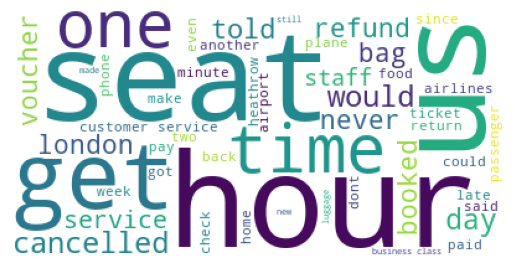

In [33]:
text_positive = ' '.join(unverified_reviews['reviews'].loc[unverified_reviews['sentiment']=='Negative'].str.lower())
pos_cloud = wc.generate(text_positive)
plt.imshow(pos_cloud)
plt.axis("off")
plt.show()

### Verified Reviews

In [34]:
colors = ['#0192d1', '#D10022', '#D1C700']
fig = px.pie(verified_reviews, values=verified_reviews['sentiment'].value_counts().to_numpy(), names=['positive', 'negative', 'neutral'])
fig.update_traces(textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

### Unverified Reviews

In [35]:
colors = ['#0192d1', '#D10022', '#D1C700']
fig = px.pie(unverified_reviews, values=unverified_reviews['sentiment'].value_counts().to_numpy(), names=['positive', 'negative', 'neutral'])
fig.update_traces(textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

# Charts

In [36]:
colors = ['#0192d1', '#D10022', '#D1C700']
fig = px.pie(reviews, values=reviews['sentiment'].value_counts().to_numpy(), names=['positive', 'negative', 'neutral'])
fig.update_traces(textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [37]:
fig = px.histogram(reviews, x='sentiment', text_auto=True)
fig.show()

In [43]:
verified_reviews['sentiment']

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      Negative
1      Positive
3      Positive
5      Positive
7      Positive
         ...   
995    Positive
996    Negative
997    Positive
998    Positive
999    Negative
Name: sentiment, Length: 772, dtype: object>

In [42]:
unverified_reviews['sentiment'].value_counts()

sentiment
Negative    99
Positive    99
Neutral     30
Name: count, dtype: int64

In [39]:
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", 
                           x=verified_reviews['sentiment'], 
                           name="Verified Reviews"))
fig.add_trace(go.Histogram(histfunc="count", 
                           x=unverified_reviews['sentiment'], 
                           name="Unverified Reviews"))

fig.show()

In [ ]:
fig = px.histogram(headers, x='sentiment', text_auto=True)
fig.show()